
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 600.  Construct portfolios from the 600 stocks in the S&P 600 small cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp600-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,AAP,"Advance Auto Parts, Inc.",US Stocks:Consumer Discretionary,98.99,242.43,-26.46,-38.44,-17.25,33.39,20.36,47.46,-38.44,-1824.36
1,AAT,American Assets Trust,US Stocks:Real Estate,-56.22,-34.78,10.44,-6.86,-8.51,31.25,19.72,30.03,-6.86,-206.01
2,ABCB,Ameris Bancorp,US Stocks:Financials,76.98,24.97,27.86,10.10,11.49,26.24,13.88,37.69,10.10,0.27
3,ABG,Asbury Automotive Group,US Stocks:Consumer Discretionary,999.11,170.12,35.87,23.22,24.22,48.83,15.08,38.42,23.22,0.60
4,ABM,"ABM Industries, Inc.",US Stocks:Industrials,67.54,-0.09,29.74,11.17,8.51,20.78,10.30,25.50,11.17,0.44
5,ABR,Arbor Realty Trust,US Stocks:Financials,-24.02,-30.96,6.62,2.87,8.85,24.16,15.97,41.25,2.87,0.07
6,ACA,"Arcosa, Inc.",US Stocks:Industrials,63.99,33.50,26.61,29.56,17.94,28.34,15.73,28.88,29.56,1.02
7,ACAD,Acadia Pharmaceuticals,US Stocks:Healthcare,281.47,156.84,-30.45,-5.24,-14.79,45.12,26.09,47.43,-5.24,-248.53
8,ACIW,ACI Worldwide,US Stocks:Technology,60.12,32.73,73.41,18.44,8.60,25.28,14.98,37.18,18.44,0.50
9,ACLS,"Axcelis Technologies, Inc.",US Stocks:Technology,-29.62,-70.27,-49.03,3.33,22.58,31.91,20.04,56.49,3.33,0.06


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
329,MDU,"MDU Resources Group, Inc.",US Stocks:Utilities,-11.36,51.53,69.12,21.77,14.14,21.25,11.94,24.65,21.77,0.88
86,BMI,"Badger Meter, Inc.",US Stocks:Technology,-1.89,21.67,47.55,35.59,29.36,24.53,17.09,27.70,35.59,1.28
478,SKT,"Tanger Factory Outlet Centers, Inc.",US Stocks:Real Estate,-25.10,-5.52,23.66,29.14,23.15,20.10,11.03,30.40,29.14,0.96
259,HWKN,"Hawkins, Inc.",US Stocks:Materials,-82.53,-30.26,57.13,43.85,40.11,47.73,37.51,40.49,43.85,1.08
415,POWL,"Powell Industries, Inc.",US Stocks:Industrials,92.34,-28.92,195.62,105.08,44.34,90.03,60.31,69.88,105.08,1.50
11,ADMA,"ADMA Biologics, Inc.",US Stocks:Healthcare,-61.58,-12.75,201.87,124.89,31.55,53.60,41.66,50.92,124.89,2.45
408,PJT,"PJT Partners, Inc.",US Stocks:Financials,79.37,101.55,69.30,38.58,32.08,30.95,13.31,29.22,38.58,1.32
47,AROC,"Archrock, Inc.",US Stocks:Energy,326.90,279.39,73.58,57.02,34.48,57.34,38.24,35.04,57.02,1.63
98,CALM,"Cal-Maine Foods, Inc.",US Stocks:Consumer Staples,130.02,126.16,104.71,48.37,28.30,43.85,27.11,29.40,48.37,1.65
404,PHIN,"PHINIA, Inc.",US Stocks:Consumer Discretionary,129.86,59.36,70.25,70.25,70.25,27.04,9.67,34.18,70.25,2.06


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,MDU,BMI,SKT,HWKN,POWL,ADMA,PJT,AROC,CALM,PHIN,MSGS,Ranked Portfolio
Annual Returns,21.77,35.59,29.14,43.85,105.08,124.89,38.58,57.02,48.37,70.25,12.47,42.24
Std Dev,24.65,27.70,30.40,40.49,69.88,50.92,29.22,35.04,29.40,34.18,24.72,22.09
Sharpe Ratio,0.88,1.28,0.96,1.08,1.50,2.45,1.32,1.63,1.65,2.06,0.50,1.91
Weight,0.13,0.09,0.14,0.04,0.03,0.04,0.12,0.04,0.06,0.16,0.16,1.00
Worst Typical Down Year,-27.53,-19.81,-31.66,-37.13,-34.68,23.05,-19.86,-13.06,-10.43,1.89,-36.97,-1.95
Black Swan,-52.18,-47.51,-62.06,-77.62,-104.56,-27.87,-49.08,-48.10,-39.83,-32.29,-61.69,-24.04


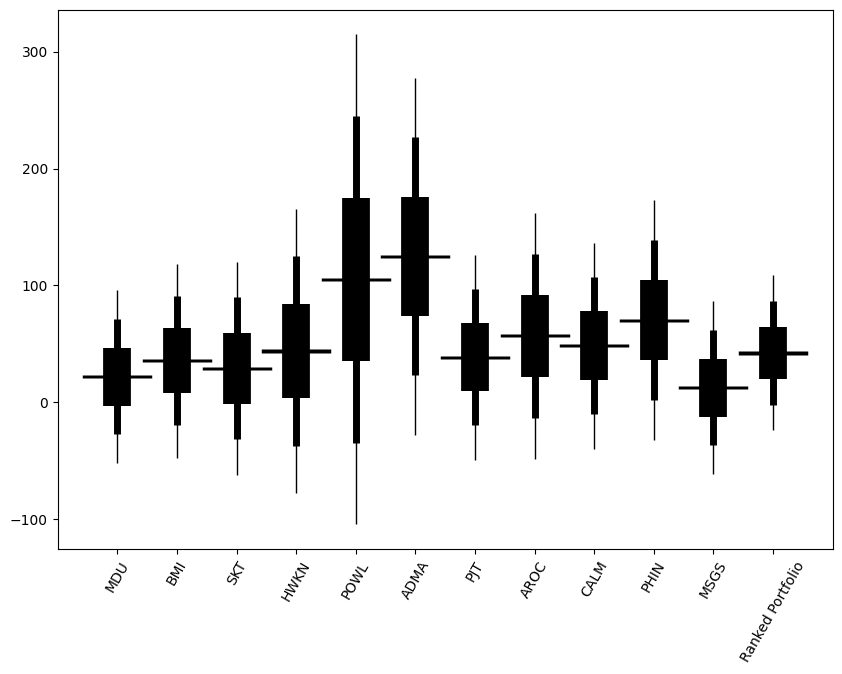

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

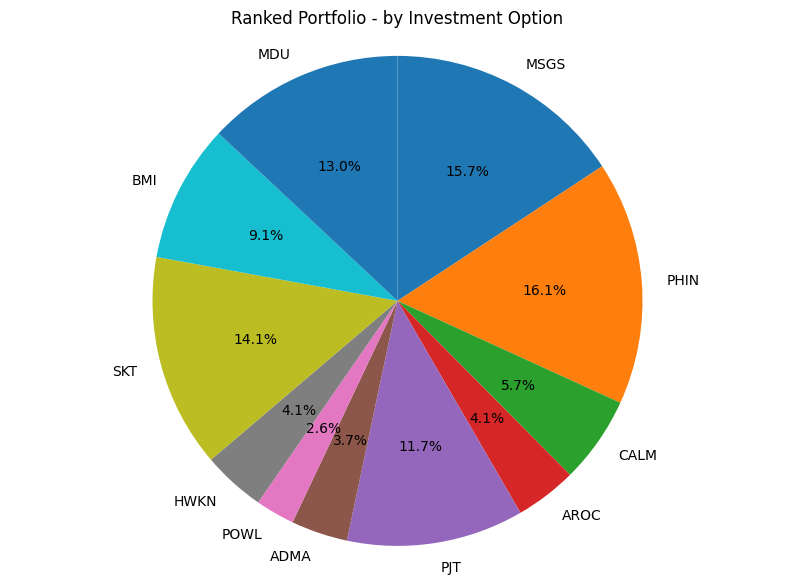

MSGS   0.16
PHIN   0.16
CALM   0.06
AROC   0.04
PJT    0.12
ADMA   0.04
POWL   0.03
HWKN   0.04
SKT    0.14
BMI    0.09
MDU    0.13



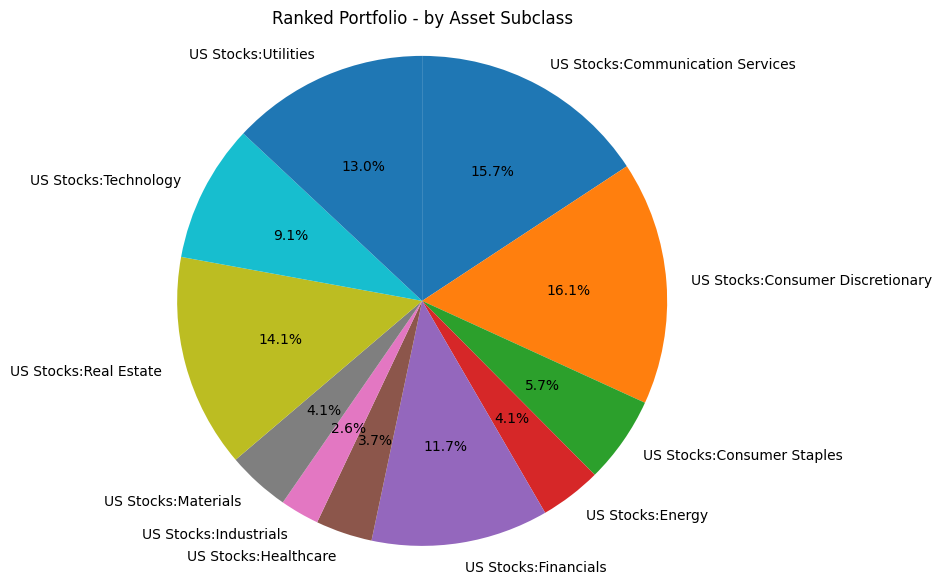

US Stocks:Communication Services   0.16
US Stocks:Consumer Discretionary   0.16
US Stocks:Consumer Staples         0.06
US Stocks:Energy                   0.04
US Stocks:Financials               0.12
US Stocks:Healthcare               0.04
US Stocks:Industrials              0.03
US Stocks:Materials                0.04
US Stocks:Real Estate              0.14
US Stocks:Technology               0.09
US Stocks:Utilities                0.13



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    MDU                            0.1303
    BMI                            0.0910
    SKT                            0.1410
    HWKN                           0.0415
    POWL                           0.0258
    ADMA                           0.0373
    PJT                            0.1169
    AROC                           0.0407
    CALM                           0.0574
    PHIN                           0.1608
    MSGS                           0.1574


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).